In [1]:
#Updated ps_mouse.csv on 7/12/2018

In [2]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#sns.set_style('whitegrid') #Makes a white backround with gray horizontal gridmarks at y-values
sns.set_context('notebook')

In [4]:
def get_ps_df():
    '''To read the Patchseq Google Doc as a pandas dataframe.

    Returns:
        ps_df: pandas dataframe
    '''    
    ps_df = pd.read_csv("C:/users/ramr/documents/github/coding/personal-projects/csv/ps_mouse.csv")
    ps_df = ps_df.loc[:, ["Date", "User", "Picogreen conc. (pg/uL)", "Picogreen yield (pg)", "Ratio >400/total", "PCR cycles", "SM_QC_PF", "Lims tube id"]]
    return ps_df

In [5]:
def sort_df(df):
    
    #Changing to string to add 20 in front of strings within date column
    df['Date'] = df['Date'].astype('str')
    df['Date'] = '20' + df['Date']
    df['Date'] = pd.to_datetime(df['Date']) #Converting date to YYYY-MM-DD
    df = df.set_index('Date') #Set date column as index column

    #Production Date Start = '2017-10-01' 
    start_date = '2017-10-01'
    df = df[start_date:] #Choosing start & end date  
    df.sort_index(inplace = True)
    
    #Categories
    df['User'] = df['User'].astype('category')
    df['PCR cycles'] = df['PCR cycles'].astype('category')
    df['SM_QC_PF'] = df['SM_QC_PF'].astype('category')

    #Filtering Columns
    df = df[df['PCR cycles'] == 21]      #Shows 21 pcr cycles
    df = df[df['SM_QC_PF'] != 'cnt']     #Shows everything except (cnt = control)
    df.drop(['PCR cycles', 'SM_QC_PF'], axis = 1, inplace = True)
    df.dropna(subset = ['User', 'Picogreen conc. (pg/uL)', 'Picogreen yield (pg)', 'Ratio >400/total'], inplace = True)
    df['Ratio >400/total'] = df['Ratio >400/total'].str[:-1] #Getting rid of % sign
    df['Ratio >400/total'] = df['Ratio >400/total'].astype(float)
    return df 

In [6]:
#Making global variables
ps_df = get_ps_df()
ps_df = sort_df(ps_df)

In [7]:
ps_df.head()

,User,Picogreen conc. (pg/uL),Picogreen yield (pg),Ratio >400/total,Lims tube id
Date,,,,,
2017-10-02,P2,750.0,9003.0,42.0,P2S4_171002_051_A01
2017-10-02,P2,1148.0,13780.0,70.0,P2S4_171002_052_A01
2017-10-02,P2,212.0,2549.0,49.0,P2S4_171002_053_A01
2017-10-02,P2,478.0,5741.0,62.0,P2S4_171002_054_A01
2017-10-02,P2,1283.0,15401.0,72.0,P2S4_171002_055_A01


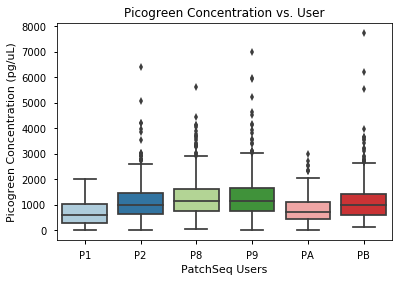

In [8]:
sns.boxplot(x = 'User', y = 'Picogreen conc. (pg/uL)',
            data = ps_df[ps_df['Picogreen conc. (pg/uL)'] < 8000], 
            order = ['P1', 'P2', 'P8', 'P9', 'PA', 'PB'], 
            palette = 'Paired').set_title('Picogreen Concentration vs. User')
plt.xlabel('PatchSeq Users')
plt.ylabel('Picogreen Concentration (pg/uL)')
#plt.savefig("box_picogreen_conc_vs_user")

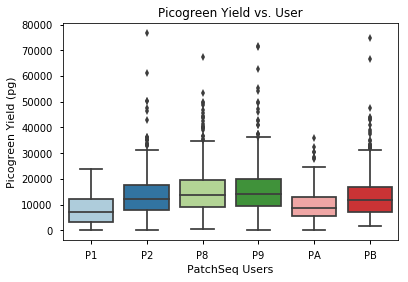

In [9]:
sns.boxplot(x = "User", y = "Picogreen yield (pg)", 
            data = ps_df[ps_df["Picogreen yield (pg)"] < 80000], 
            order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
            palette = "Paired").set_title("Picogreen Yield vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Picogreen Yield (pg)")

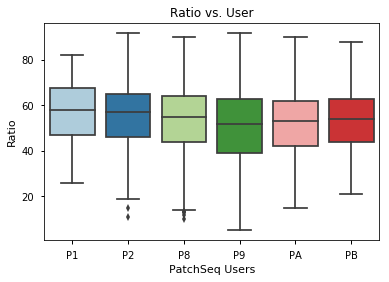

In [10]:
sns.boxplot(x = "User", y = "Ratio >400/total", 
            data = ps_df[ps_df["Ratio >400/total"] <= 100],
            order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
            palette = "Paired").set_title("Ratio vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Ratio")

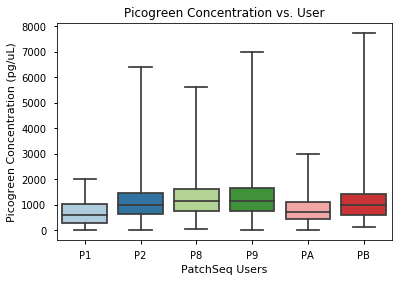

In [11]:
#whis = np.inf includes the outliers
sns.boxplot(x = 'User', y = 'Picogreen conc. (pg/uL)',
            data = ps_df[ps_df['Picogreen conc. (pg/uL)'] < 8000], 
            order = ['P1', 'P2', 'P8', 'P9', 'PA', 'PB'],
            palette = 'Paired', whis = np.inf).set_title("Picogreen Concentration vs. User")
plt.xlabel('PatchSeq Users')
plt.ylabel('Picogreen Concentration (pg/uL)')

### Extras

In [12]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']